In [2]:
#Improt Libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

#Improt Dataset
#https://www.kaggle.com/datasets/thedevastator/know-your-worth-tech-salaries-in-2016
#Tech Salaries, A Detailed Look into the US and International Salary & Experience Landscape

df = pd.read_csv('2016_US_IT_Industry_Salary.csv')
print(df)

     index  salary_id                           employer_name  \
0        0          1                                  opower   
1        1          3                                 walmart   
2        2          4                      vertical knowledge   
3        5         14                                  casino   
4        6         16                              tetra tech   
..     ...        ...                                     ...   
542   1646       3276                      homenet automotive   
543   1647       3278                                 comcast   
544   1649       3287  mainz brady group - contractor at nike   
545   1650       3289                    sparkfun electronics   
546   1653       3294                             of maryland   

         location_name location_state location_country  \
0    san francisco, ca             CA               US   
1      bentonville, ar             AR               US   
2        cleveland, oh             OH        

In [3]:
#Reviewing data
round(df.describe(),0)

#We can see the min and max of annual base pay are quite different. We need to deal with these outliers.

,index,salary_id,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,Total_Income
count,547.0,547.0,528.0,529.0,547.0,547.0,547.0,547.0
mean,764.0,1559.0,7.0,3.0,140177.0,22440.0,6553.0,169171.0
std,478.0,937.0,6.0,3.0,588172.0,287461.0,24831.0,787274.0
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,336.0,717.0,3.0,1.0,73000.0,0.0,0.0,75000.0
50%,747.0,1557.0,5.0,2.0,100000.0,0.0,0.0,110000.0
75%,1132.0,2272.0,10.0,3.0,126500.0,5000.0,6000.0,140000.0
max,1653.0,3294.0,40.0,30.0,10280000.0,5000000.0,500000.0,14250000.0


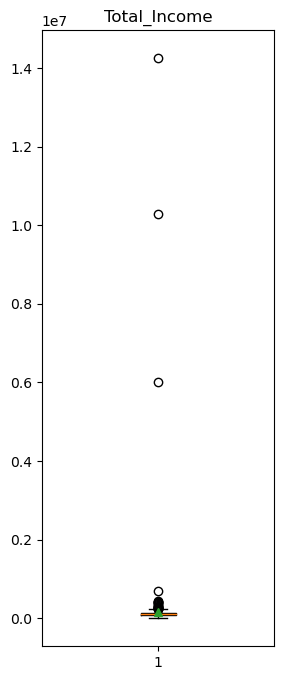

In [3]:
#Have a look at the distribution first
plt.figure(figsize=(3,8))
plt.boxplot(df['Total_Income'],showmeans=True)
plt.title('Total_Income')
plt.show()

Skewness: 15.16, Kurtosis: 242.42


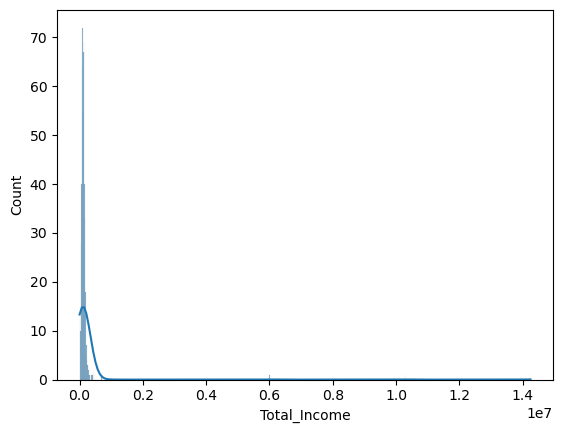

In [4]:
#The distribution is significantly imbalanced, we need to review the skewness and the kurtosis in order to summarize the trend of the distribution.
skewness = round(df['Total_Income'].skew(), 2)
kurtosis = round(df['Total_Income'].kurt(), 2)
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

sns.histplot(df['Total_Income'], kde=True)
plt.show()

Skewness: 6.58, Kurtosis: 75.78


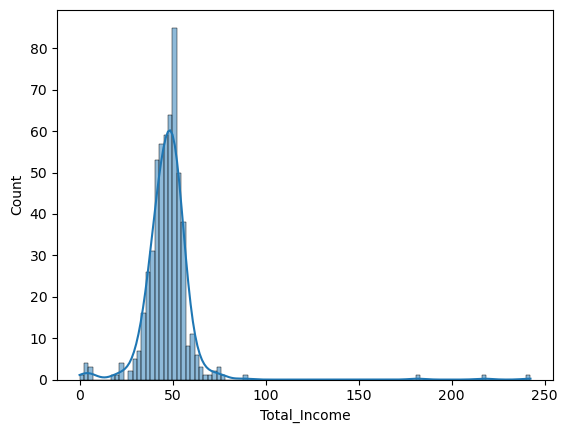

In [6]:
transform_data = df['Total_Income']**(1/3)
# skewness and kurtosis
skewness = round(transform_data.skew(), 2)
kurtosis = round(transform_data.kurt(), 2)
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

# Generate the diagram of distribution
sns.histplot(transform_data, kde=True)
plt.show()

In [8]:
#Take out all the values(Outliers) which is over 1.5 IQR to reprvent the affection of Model
print ("Shape Of The Before Ouliers: ",df['Total_Income'].shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(df['Total_Income'],75) - np.percentile(df['Total_Income'],25)
# outlier = Q3 + n*IQR 
transform_data=df[df['Total_Income'] < np.percentile(df['Total_Income'],75)+n*IQR]
# outlier = Q1 - n*IQR 
transform_data=transform_data[transform_data['Total_Income'] > np.percentile(transform_data['Total_Income'],25)-n*IQR]['Total_Income']
print ("Shape Of The After Ouliers: ",transform_data.shape)


Shape Of The Before Ouliers:  (547,)
Shape Of The After Ouliers:  (526,)


In [10]:
#Review the updated data set
print(transform_data) 

0      130000.0
1       70000.0
2       97000.0
3       40500.0
4       46500.0
         ...   
542     60010.0
543    116008.0
544        50.0
545     61300.0
546     75000.0
Name: Total_Income, Length: 526, dtype: float64


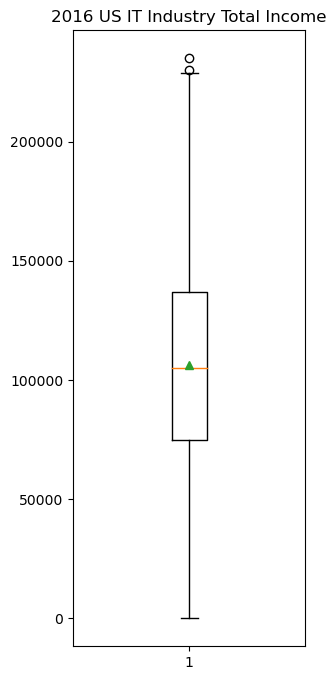

In [12]:
#Let us review the distribution in boxplot
plt.figure(figsize=(3,8))
plt.boxplot(transform_data,showmeans=True)
plt.title('2016 US IT Industry Total Income')
plt.show()

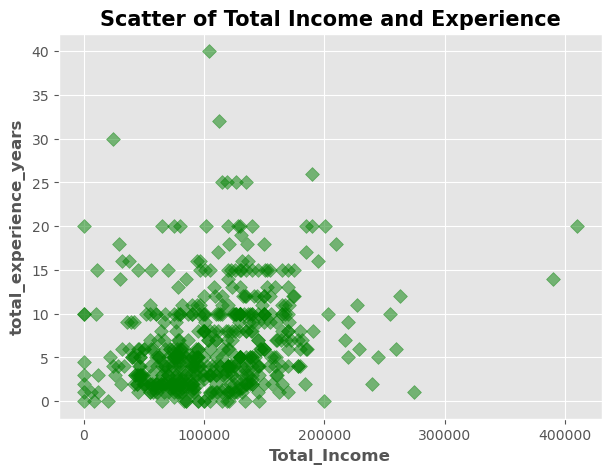

In [14]:
#I am a bit curious about the relationship between work experience and pays.
plt.figure(figsize=(7,5))   

plt.style.use("ggplot")     
plt.xlabel("Total_Income", fontweight = "bold")                  
plt.ylabel("total_experience_years", fontweight = "bold")   
plt.title("Scatter of Total Income and Experience",
          fontsize = 15, fontweight = "bold")        

plt.scatter(df["Total_Income"],                   
            df["total_experience_years"],     
            c = "g",                                 
            s = 50,                                
            alpha = .5,                              
            marker = "D")                            

In [ ]:
#After removing the outliers, the distribution became much clearer than before.
#We can easily local the numbers we want from the data set, the mean of total income would be $110000, the upper quarter would be $140000 and the lower quarter would be $75000.

#According to the statistic from the U.S. census, the Annual mean salary per employee in the U.S. in 2016 was $60,826. As a result, we can see the mean of the IT industry's annual base pay($100000) is 164% of the mean salary. 
#If we compare it with the total income of the year, it would be 180% of the mean salary. This means as an employee in the IT industry your salary is significantly higher than the average.

#We are unable to see a clear relationship between experience and the total income, however we can still find a trend from the scatter gram. If you got more experience in the industry the income would be generous.
